# Lasso Cox demo

In [2]:
library(glmnet)

In [4]:
#载入数据。
#包含30个基因在1000个病人样本中的表达，另一个是每个患者的生存状态和生存时间，生存时间以年为单位，如下：
data('CoxExample')

In [5]:
# 1000行(病人)，30列(基因)
dim(x)
x[1:10,1:5]

[1] 1000   30

-0.8767670,-0.6135224,-0.56757380,0.66215994,1.82218019
-0.7463894,-1.7519457,0.28545898,1.13921055,0.80178007
1.3759148,-0.2641132,0.88727408,0.38418702,0.05751801
0.2375820,0.7859162,-0.89670281,-0.83393380,-0.58237643
0.1086275,0.4665686,-0.57637261,1.70413136,0.32750715
1.2027213,-0.4187073,-0.05735193,0.59484915,0.44328682
-0.4590724,0.4140486,0.87286118,1.37656346,0.96739058
0.6403460,0.9754372,-0.38440407,0.02511687,0.74576547
0.4167875,0.8356885,1.54530465,-1.02988660,-1.23843050
0.7765431,0.8140571,-0.42338915,-0.44327120,0.02147758


In [6]:
# 1000行(病人) 2列(生存时间、终点)
dim(y)
head(y)

[1] 1000    2

time,status
1.76877757,1
0.54528404,1
0.04485918,0
0.85032298,0
0.61488426,1
0.29860939,0


## 整理数据(30个基因在1000个病人)

In [9]:
x=data.frame(x)
y=data.frame(y)

row.names(x)=paste0("patient",1:1000)
colnames(x)=paste0('gene',1:30)

row.names(y)=paste0("patient",1:1000)
colnames(y)=c('time','status')

## 构建生存分析

In [8]:
library(survival)

In [10]:
fit_sur=Surv(y$time, y$status)

In [12]:
dim(fit_sur)

[1] 1000    2

In [24]:
head(fit_sur)

[1] 1.76877757  0.54528404  0.04485918+ 0.85032298+ 0.61488426  0.29860939+

In [19]:
fit_sur[1]

[1] 1.768778

In [20]:
str(fit_sur)

 'Surv' num [1:1000, 1:2]  1.76878   0.54528   0.04486+  0.85032+  0.61488   0.29861+  0.01717+ 15.97135   0.64802   1.91448+ ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:2] "time" "status"
 - attr(*, "type")= chr "right"


## 通过glmnet函数中的设置family参数定义采用的算法模型，比如设置cox

In [25]:
fit=glmnet(as.matrix(x), fit_sur, family='cox')
fit


Call:  glmnet(x = as.matrix(x), y = fit_sur, family = "cox") 

   Df     %Dev   Lambda
1   0 0.000000 0.236800
2   1 0.001801 0.215700
3   3 0.005963 0.196600
4   3 0.010490 0.179100
5   4 0.014380 0.163200
6   4 0.018830 0.148700
7   4 0.022560 0.135500
8   4 0.025650 0.123400
9   5 0.028520 0.112500
10  6 0.031750 0.102500
11  8 0.034840 0.093380
12  8 0.038050 0.085090
13  8 0.040760 0.077530
14  9 0.043100 0.070640
15 10 0.045320 0.064370
16 10 0.047380 0.058650
17 10 0.049100 0.053440
18 10 0.050550 0.048690
19 10 0.051730 0.044360
20 10 0.052740 0.040420
21 10 0.053590 0.036830
22 10 0.054300 0.033560
23 11 0.054890 0.030580
24 13 0.055450 0.027860
25 13 0.055930 0.025390
26 13 0.056330 0.023130
27 13 0.056670 0.021080
28 14 0.056970 0.019200
29 15 0.057220 0.017500
30 17 0.057440 0.015940
31 17 0.057640 0.014530
32 18 0.057810 0.013240
33 18 0.057960 0.012060
34 18 0.058080 0.010990
35 19 0.058180 0.010010
36 19 0.058270 0.009124
37 19 0.058340 0.008313
38 20 0.058400 0.007575


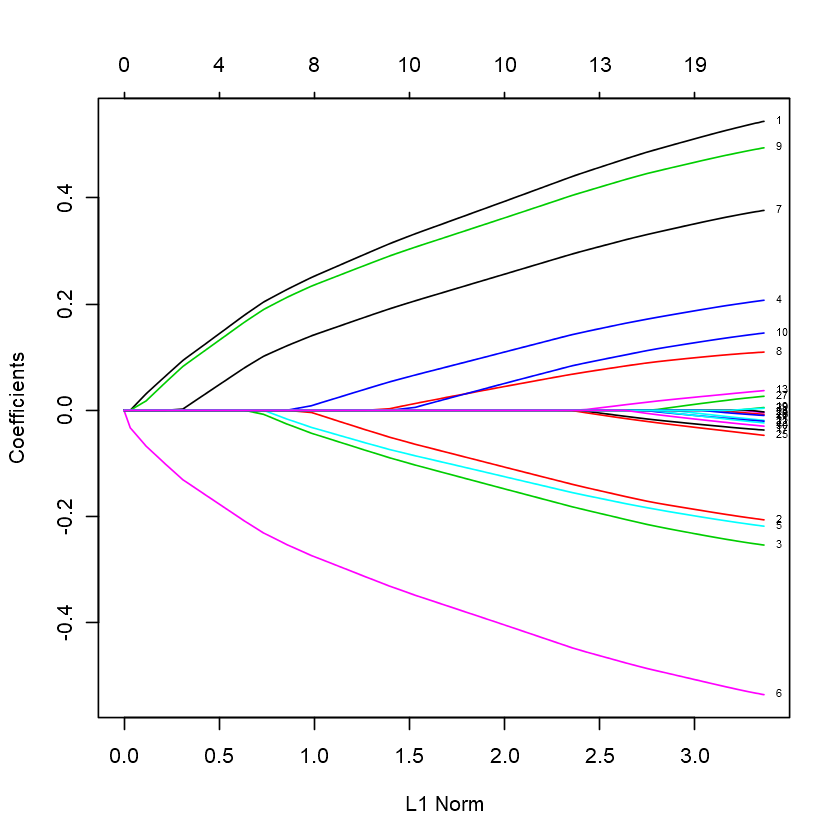

In [26]:
## 画图
plot(fit, label=T)

## Lasso回归最重要的就是选择合适的λ值，可以通过cv.glmnet函数实现

In [27]:
cv.fit=cv.glmnet(as.matrix(x), fit_sur, 
                #nfold=10,
                family='cox')
cv.fit


Call:  cv.glmnet(x = as.matrix(x), y = fit_sur, family = "cox") 

Measure: Partial Likelihood Deviance 

     Lambda Measure      SE Nonzero
min 0.01750   13.07 0.07251      15
1se 0.04869   13.13 0.06238      10

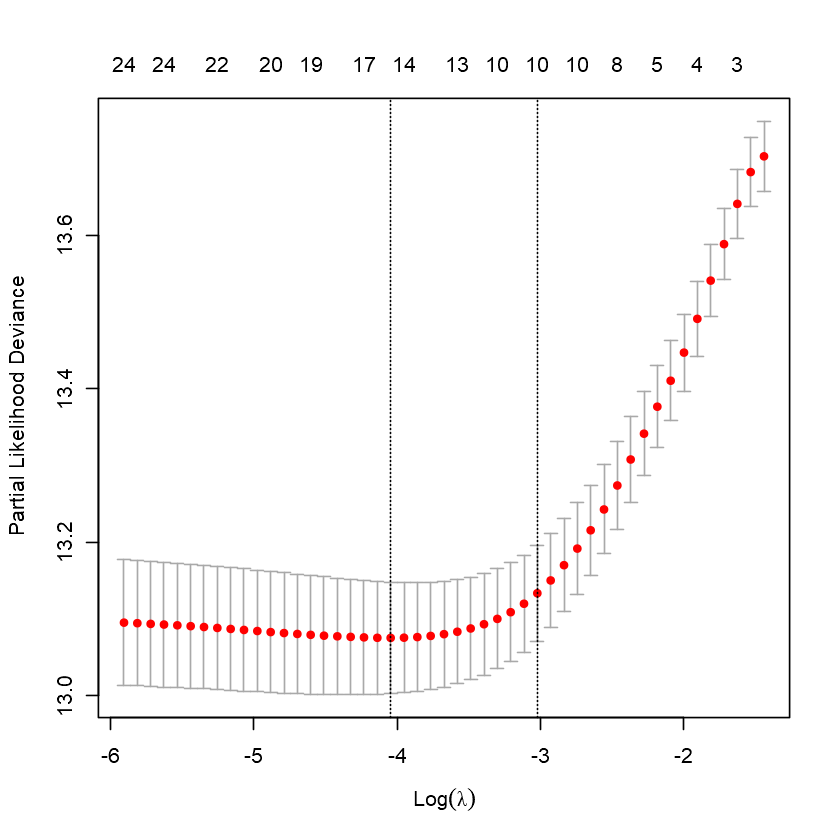

In [29]:
plot(cv.fit)

In [ ]:
# 基于该图选择最佳的λ，一般可以采用两个内置函数实现cvfit$lambda.min和 cvfit$lambda.1se 。

## 基因筛选，采用coef函数即可，有相应参数的gene则被保留，采用λ使用的是lambda.min：

In [30]:
# 我感觉采用1se更好。大小和min没有统计学差异，同时做到了参数最少化
coef.1se=coef(cv.fit, s="lambda.1se")
coef.1se

30 x 1 sparse Matrix of class "dgCMatrix"
                 1
gene1   0.38108115
gene2  -0.09838545
gene3  -0.13898708
gene4   0.10107014
gene5  -0.11703684
gene6  -0.39278773
gene7   0.24631270
gene8   0.03861551
gene9   0.35114295
gene10  0.04167588
gene11  .         
gene12  .         
gene13  .         
gene14  .         
gene15  .         
gene16  .         
gene17  .         
gene18  .         
gene19  .         
gene20  .         
gene21  .         
gene22  .         
gene23  .         
gene24  .         
gene25  .         
gene26  .         
gene27  .         
gene28  .         
gene29  .         
gene30  .         

In [ ]:
# 第二列有数值是非点号的则代表被选择的基因。

## 美化lasso图，产生如下的图：

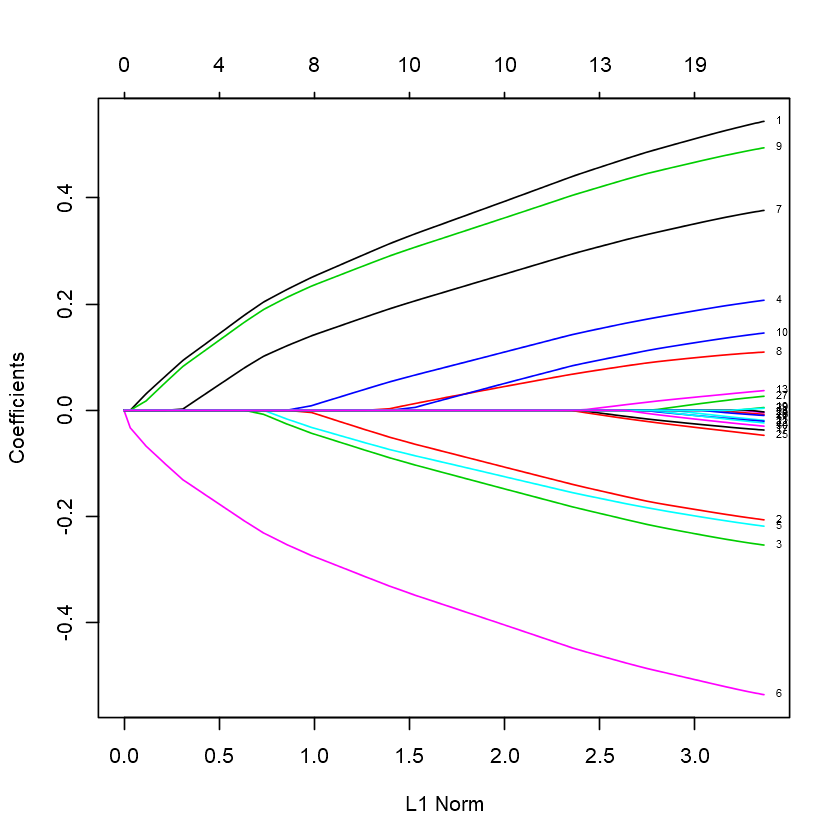

In [39]:
# 将代码封装在plot_lasso.r里面，只需要source即可，如下：
plot(fit, label=T)

In [36]:
#如果取1倍标准误内(大小和min无统计学差异)，参数最少的lambda值。【建议使用这个】
cv.fit$lambda.1se

[1] 0.04868986

In [37]:
Coefficients <- coef(fit, s = cv.fit$lambda.1se)
Active.Index <- which(Coefficients != 0)
Active.Coefficients <- Coefficients[Active.Index]
Active.Index
Active.Coefficients

[1]  1  2  3  4  5  6  7  8  9 10

[1]  0.38108115 -0.09838545 -0.13898708  0.10107014 -0.11703684 -0.39278773
 [7]  0.24631270  0.03861551  0.35114295  0.04167588

In [38]:
row.names(Coefficients)[Active.Index] #10个非0参数

[1] "gene1"  "gene2"  "gene3"  "gene4"  "gene5"  "gene6"  "gene7"  "gene8" 
 [9] "gene9"  "gene10"

## ref

In [ ]:
#手把手带你画高大上的lasso回归模型图 https://www.dxy.cn/bbs/newweb/pc/post/42430476